In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
stats_data = pd.read_csv('NBAPlayerClustering-master/Data/Regular-Advanced.csv')
shooting_data = pd.read_csv('NBAPlayerClustering-master/Data/Shooting.csv')

In [4]:
print(stats_data.shape)

(388, 20)


In [5]:
stats_data.head()

,PLAYER,TEAM,POSITION,PTS,FG%,3P%,OREB,DREB,AST,STL,BLK,+/-,AST%,AST/TO,OREB%,DREB%,TO RATIO,TS%,USG%,PIE
0,James Harden,HOU,G,36.1,44.2,36.8,0.8,5.8,7.5,2.0,0.7,4.6,39.4,1.51,2.3,15.7,12.0,61.6,39.6,20.1
1,Paul George,OKC,F,28.0,43.8,38.6,1.4,6.8,4.1,2.2,0.4,6.4,17.3,1.55,3.3,17.3,8.7,58.3,28.5,16.1
2,Giannis Antetokounmpo,MIL,F,27.7,57.8,25.6,2.2,10.3,5.9,1.3,1.5,9.1,29.4,1.58,6.6,27.3,12.0,64.4,31.4,21.8
3,Joel Embiid,PHI,F-C,27.5,48.4,30.0,2.5,11.1,3.7,0.7,1.9,5.8,18.5,1.04,7.5,29.2,11.6,59.3,32.7,19.6
4,LeBron James,LAL,F,27.4,51.0,33.9,1.0,7.4,8.3,1.3,0.6,2.1,37.6,2.30,2.9,19.3,10.2,58.8,31.1,18.8


In [6]:
stats_data.columns

Index(['PLAYER', 'TEAM', 'POSITION', 'PTS', 'FG%', '3P%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%', 'DREB%',
       'TO RATIO', 'TS%', 'USG%', 'PIE'],
      dtype='object')

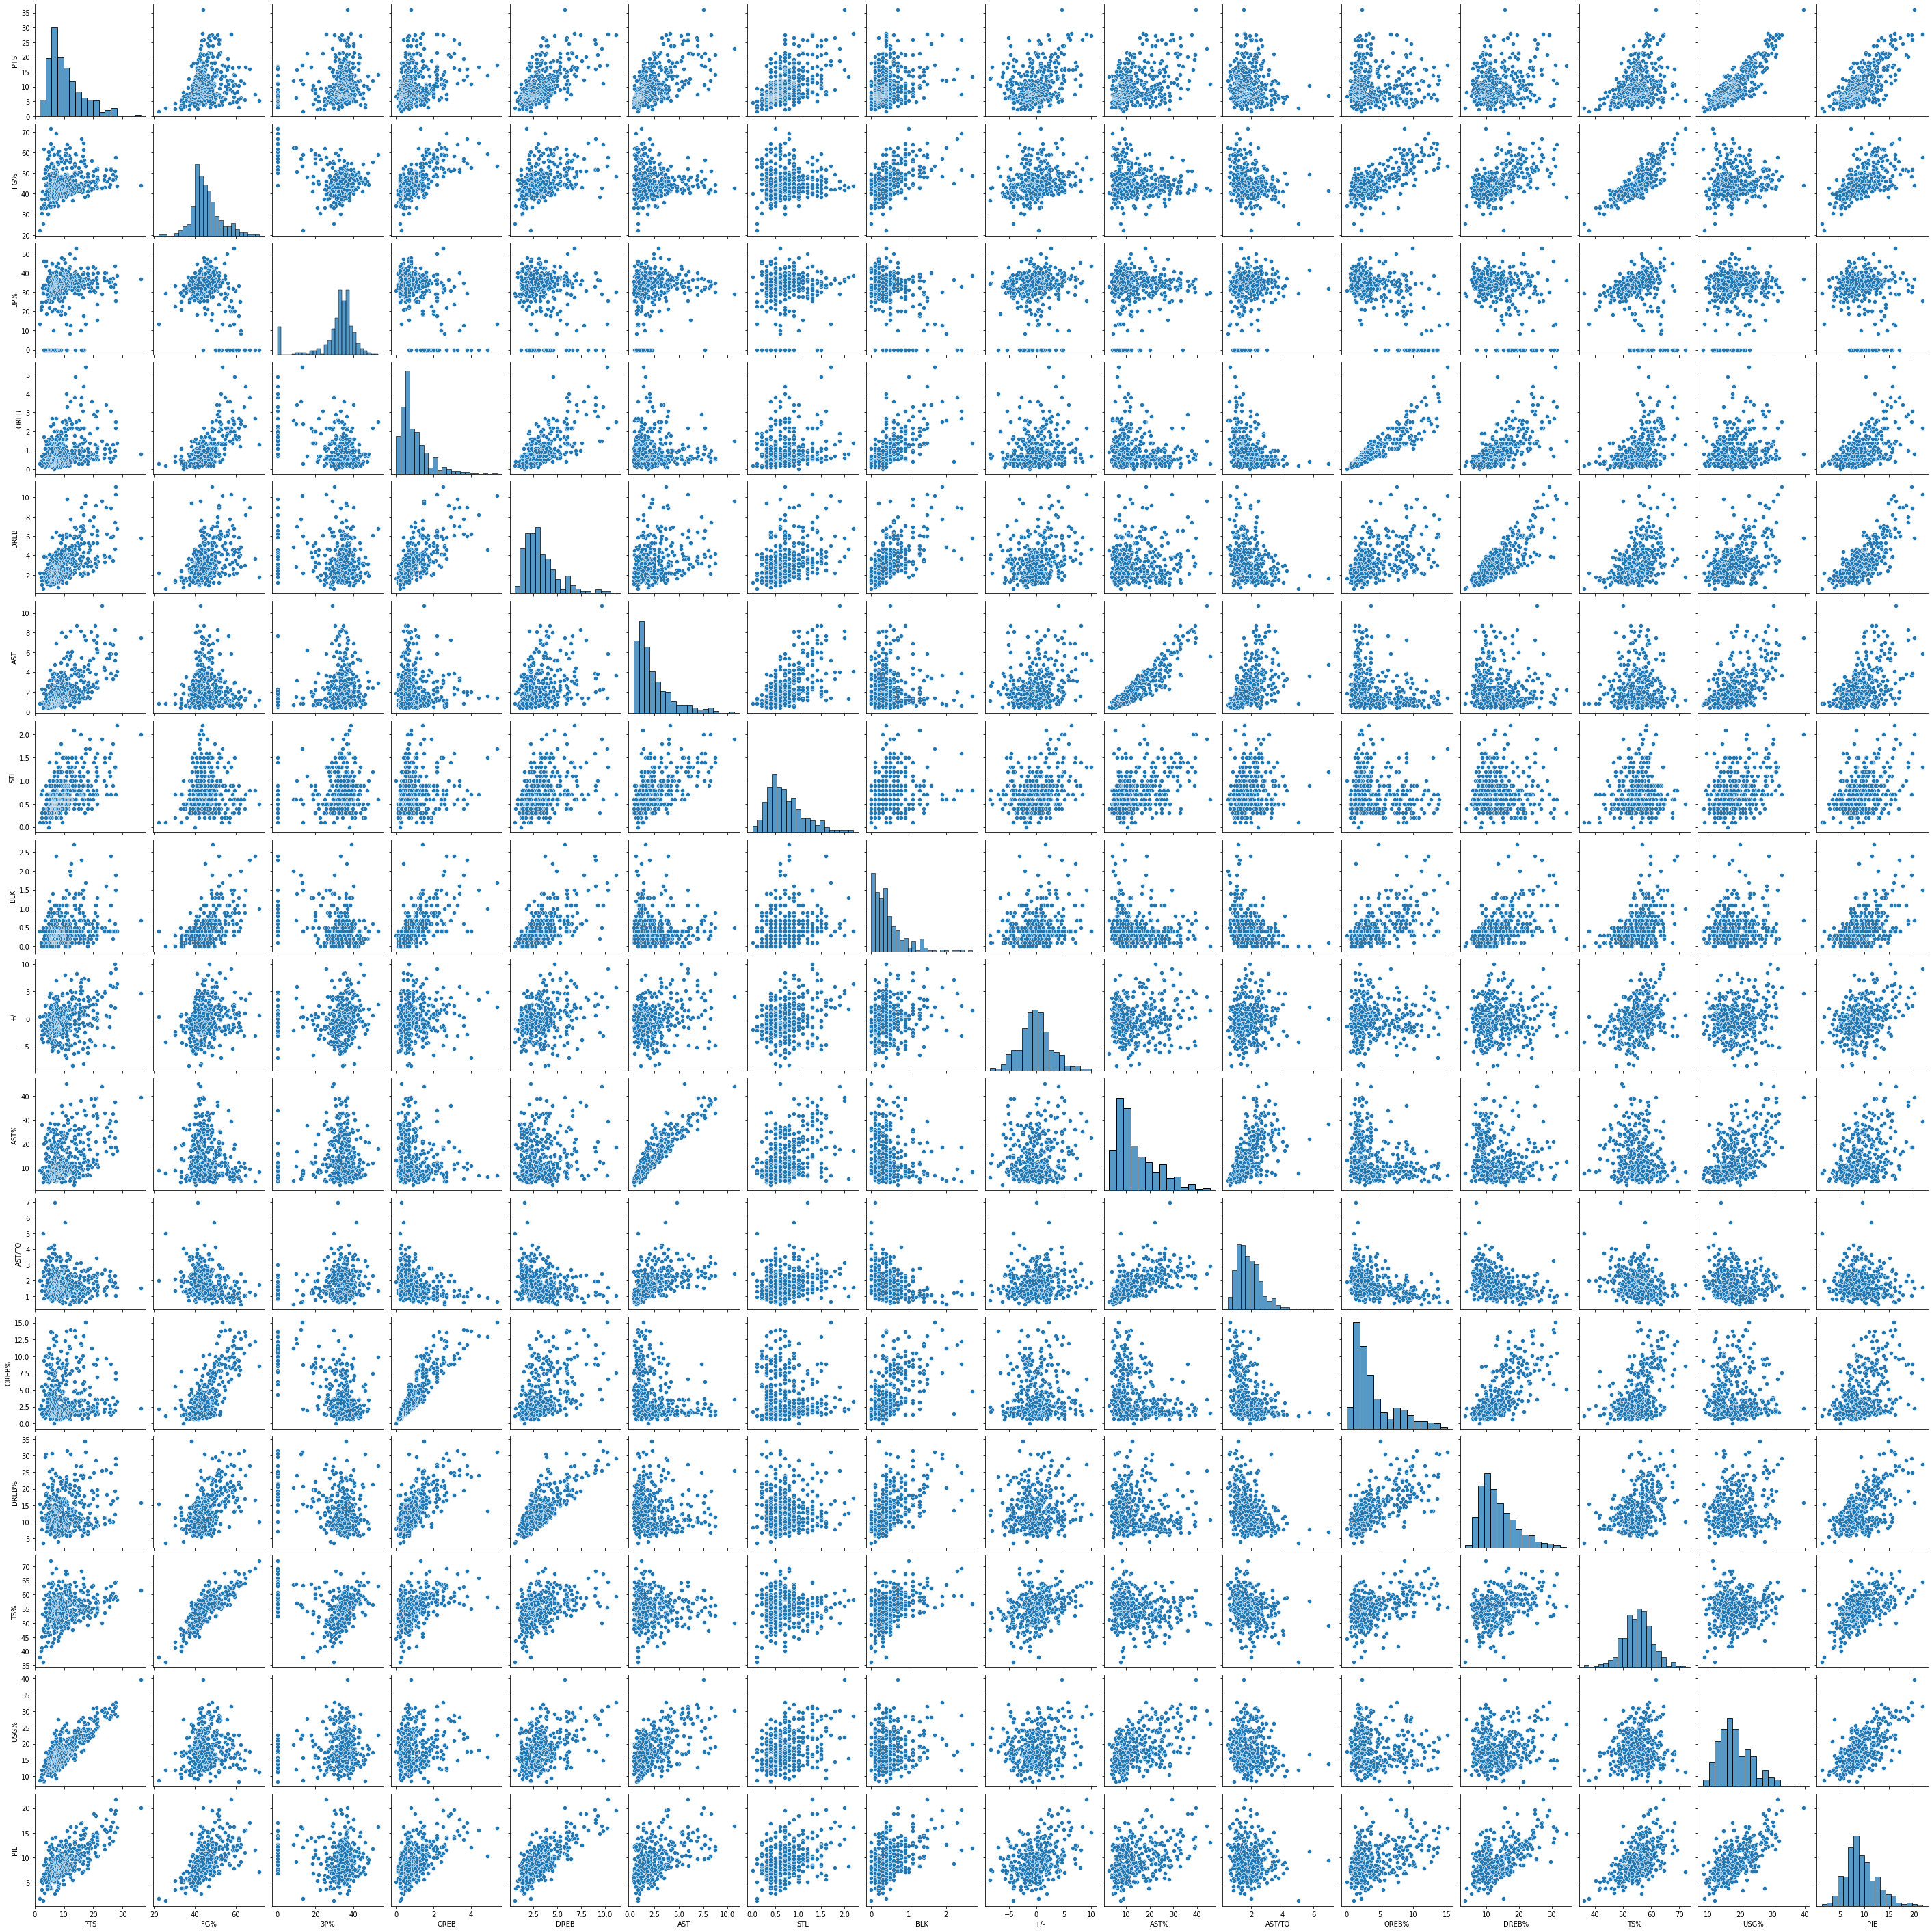

In [7]:
sns.pairplot(stats_data.drop(['TO RATIO'], axis=1))

<AxesSubplot:xlabel='DREB', ylabel='3P%'>

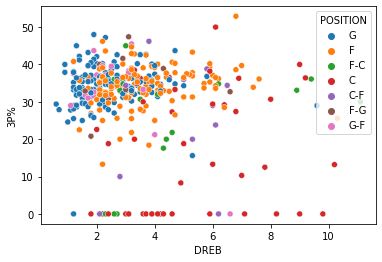

In [9]:
sns.scatterplot(X='DREB', y='3P%', hue='POSITION', data=stats_data)

<AxesSubplot:xlabel='PTS', ylabel='3P%'>

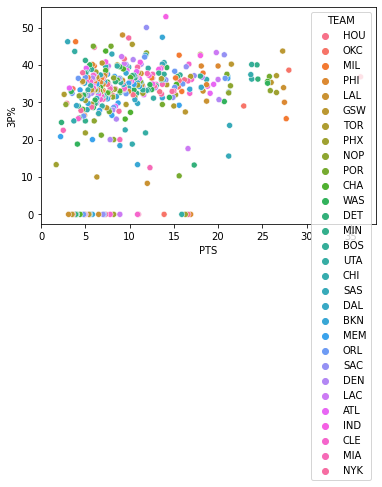

In [11]:
sns.scatterplot(X='PTS', y='3P%', hue='TEAM', data=stats_data)

<AxesSubplot:xlabel='DREB', ylabel='3P%'>

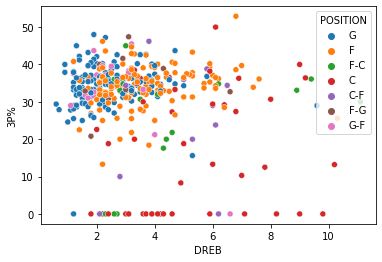

In [26]:
sns.scatterplot(x= stats_data['DREB'], y=stats_data['3P%'], hue=stats_data['POSITION'])

In [27]:
X = stats_data[['DREB', '3P%']]

In [28]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

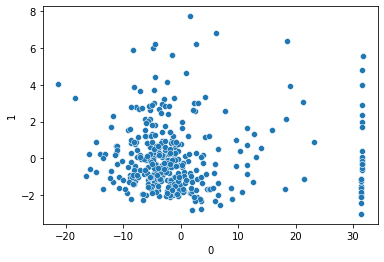

In [29]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

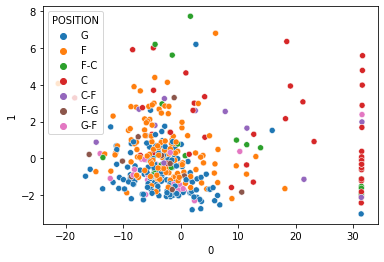

In [30]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=stats_data.POSITION)

<AxesSubplot:xlabel='0', ylabel='1'>

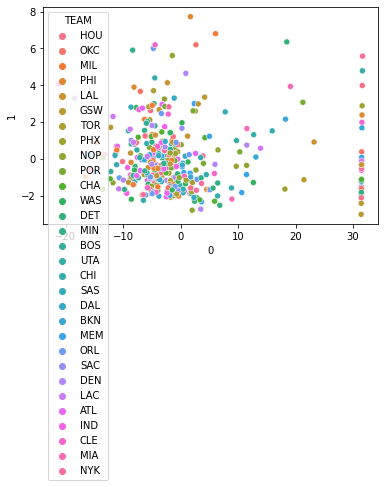

In [35]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=stats_data['TEAM'])

<AxesSubplot:xlabel='0', ylabel='1'>

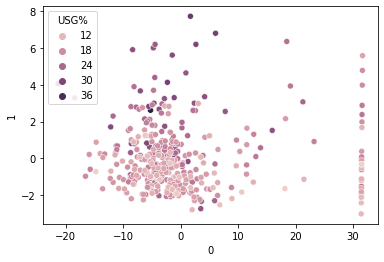

In [36]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=stats_data['USG%'])

In [37]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

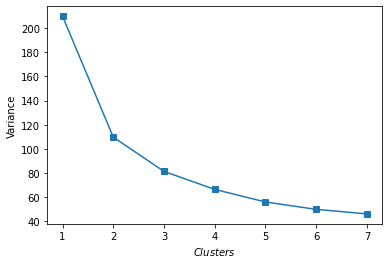

In [48]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$Clusters$')
plt.ylabel('Variance')

In [39]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [40]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

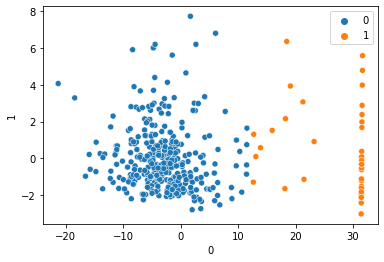

In [41]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='DREB', ylabel='3P%'>

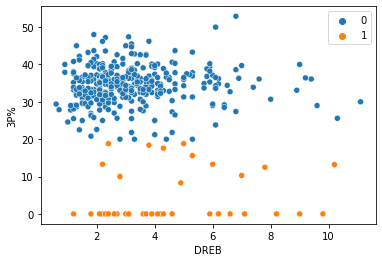

In [42]:
sns.scatterplot(x = stats_data['DREB'], y = stats_data['3P%'], hue=y)

In [44]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([stats_data, y_df], axis=1)

In [45]:
new_df

,PLAYER,TEAM,POSITION,PTS,FG%,3P%,OREB,DREB,AST,STL,...,+/-,AST%,AST/TO,OREB%,DREB%,TO RATIO,TS%,USG%,PIE,Cluster
0,James Harden,HOU,G,36.1,44.2,36.8,0.8,5.8,7.5,2.0,...,4.6,39.4,1.51,2.3,15.7,12.0,61.6,39.6,20.1,0
1,Paul George,OKC,F,28.0,43.8,38.6,1.4,6.8,4.1,2.2,...,6.4,17.3,1.55,3.3,17.3,8.7,58.3,28.5,16.1,0
2,Giannis Antetokounmpo,MIL,F,27.7,57.8,25.6,2.2,10.3,5.9,1.3,...,9.1,29.4,1.58,6.6,27.3,12.0,64.4,31.4,21.8,0
3,Joel Embiid,PHI,F-C,27.5,48.4,30.0,2.5,11.1,3.7,0.7,...,5.8,18.5,1.04,7.5,29.2,11.6,59.3,32.7,19.6,0
4,LeBron James,LAL,F,27.4,51.0,33.9,1.0,7.4,8.3,1.3,...,2.1,37.6,2.30,2.9,19.3,10.2,58.8,31.1,18.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Patrick McCaw,TOR,G,2.6,41.3,32.1,0.2,1.4,1.0,0.8,...,-2.1,9.9,1.71,1.7,10.5,14.7,53.2,9.3,4.9,0
384,Ryan Anderson,MIA,F,2.5,30.4,22.5,0.7,1.4,0.8,0.2,...,-2.9,8.8,1.36,5.5,11.2,12.8,41.4,12.0,3.6,0
385,Jose Calderon,DET,G,2.3,37.5,24.6,0.2,1.0,2.3,0.3,...,-3.5,28.2,3.29,1.5,7.8,12.8,45.3,10.4,5.6,0
386,Julian Washburn,MEM,F-G,2.2,33.3,20.8,0.4,1.8,0.8,0.7,...,-1.2,8.3,2.00,2.7,12.8,9.9,40.2,9.6,5.3,0


In [46]:
pca_df

,0,1
0,-5.257758,2.613959
1,-7.028952,3.664137
2,6.064252,6.797510
3,1.688465,7.720815
4,-2.313950,4.131850
...,...,...
383,-0.683235,-1.916354
384,8.912975,-2.186074
385,6.802566,-2.526915
386,10.623543,-1.833995


In [47]:
import plotly.express as px

<AxesSubplot:>

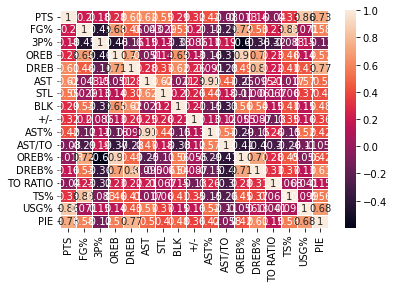

In [53]:
sns.heatmap(stats_data.corr(), annot=True, linewidth=.5)

In [51]:
all_data.columns

Index(['PLAYER', 'TEAM', 'POSITION', 'PTS', 'FG%', '3P%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%', 'DREB%',
       'TO RATIO', 'TS%', 'USG%', 'PIE', 'FGM_<5', 'FG%_<5', 'FGM_5-9',
       'FG%_5-9', 'FGM_10-14', 'FG%_10-14', 'FGM_15-19', 'FG%_15-19',
       'FGM_20-24', 'FG%_20-24', 'FGM_25-29', 'FG%_25-29'],
      dtype='object')

In [21]:
sns.scatterplot(x = stats_data[''] )

PLAYER              object
TEAM                object
POSITION            object
PTS                float64
FG%                float64
3P%                float64
OREB               float64
DREB               float64
AST                float64
STL                float64
BLK                float64
+/-                float64
AST%               float64
AST/TO             float64
OREB%              float64
DREB%              float64
TO RATIO           float64
TS%                float64
USG%               float64
PIE                float64
<6_DIF_FREQ        float64
<6_DFGM            float64
<6_DIFF%           float64
6-9_DIF_FREQ       float64
6-9_DFGM           float64
6-9_DIFF%          float64
10-15_DIF_FREQ     float64
10-15_DFGM         float64
10-15_DIFF%        float64
16-3PT_DIF_FREQ    float64
16-3PT_DFGM        float64
16-3PT_DIFF%       float64
3PT_DIF_FREQ       float64
3PT_DFGM           float64
3PT_DIFF%          float64
FGM_<5             float64
FG%_<5             float64
F

In [22]:
pd.set_option('display.max_columns', None)
import numpy as np
from utils import Principle_Component_Analysis

ModuleNotFoundError: No module named 'utils'